# Assignment 5
# Karthik R
# 21BIT0023

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df=df.drop(columns=['CustomerID'],axis=1)

In [6]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 200 artists>

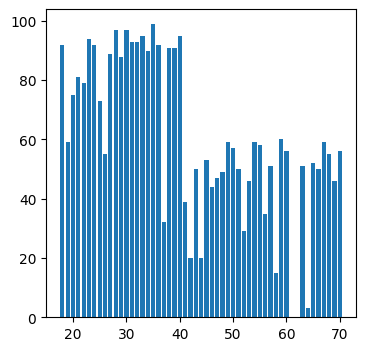

In [10]:
plt.figure(figsize=(4,4))
plt.bar(df['Age'], df['Spending Score (1-100)'])

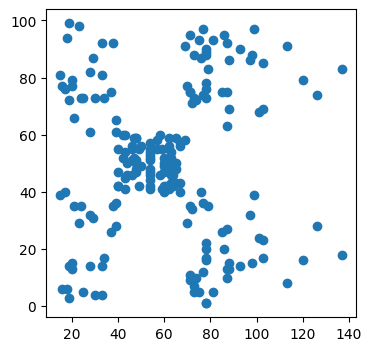

In [11]:
plt.figure(figsize=(4,4))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

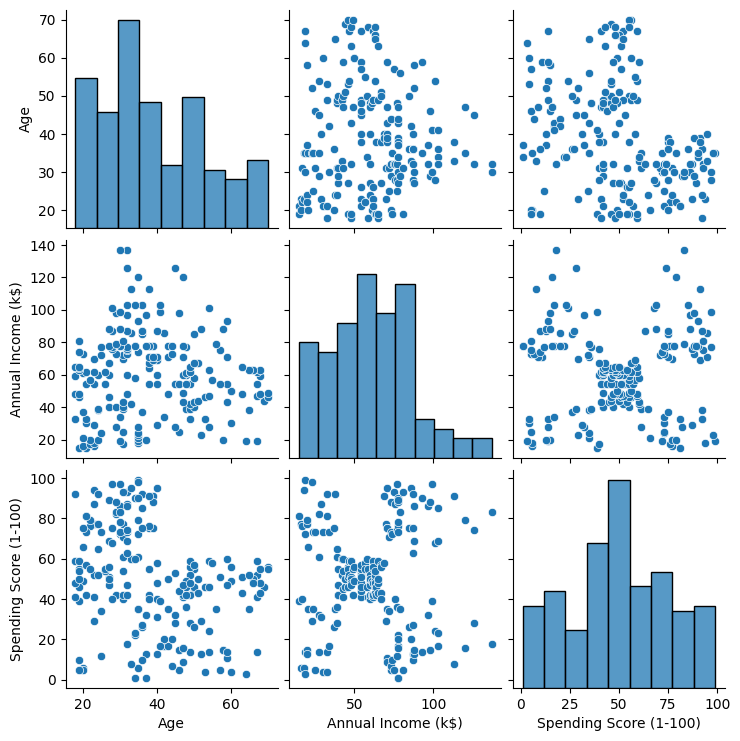

In [12]:
sns.pairplot(df)

<ipython-input-13-6aab38f112ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

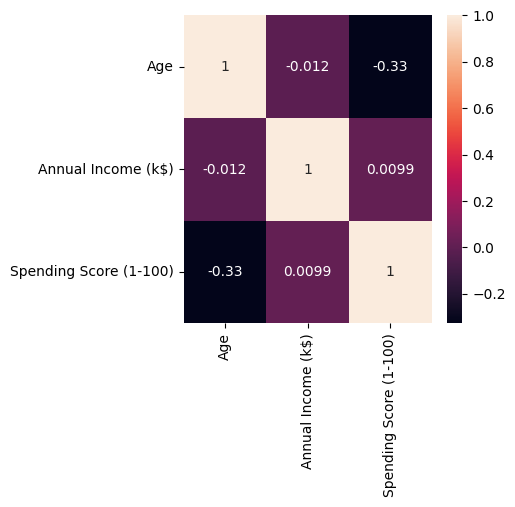

In [13]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True)


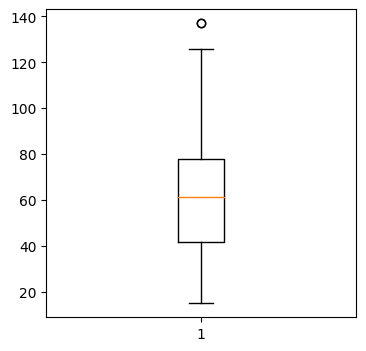

In [14]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Annual Income (k$)'])
plt.show()

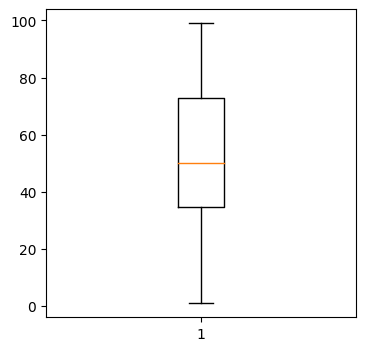

In [15]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Spending Score (1-100)'])
plt.show()

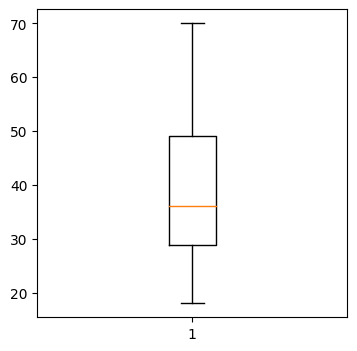

In [16]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Age'])
plt.show()

In [17]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)

In [18]:
df.median()

<ipython-input-18-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

In [19]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,61.5,df['Annual Income (k$)'])

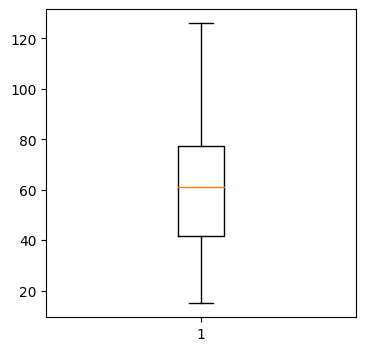

In [20]:
plt.figure(figsize=(4,4))
plt.boxplot(df['Annual Income (k$)'])
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [22]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [23]:
from sklearn import cluster

In [24]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [25]:
error

[87.64248645238291,
 38.256261727718496,
 30.53615452035327,
 23.37397528270042,
 20.102172077784857,
 17.128172918518988,
 14.850573520364879,
 12.608723763869847,
 10.917668890407121,
 9.591940516007261]

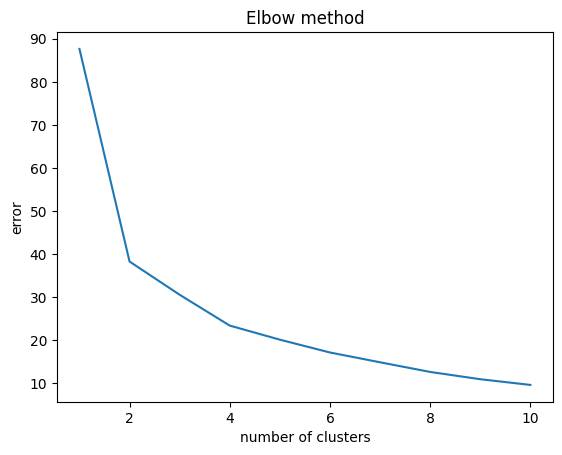

In [26]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [27]:
km_model = cluster.KMeans(n_clusters=4,init = 'k-means++',random_state=0)

In [28]:
km_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [29]:
pred = km_model.predict(df)
pred

array([3, 3, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3], dtype=int32)

In [30]:
km_model.predict([[1,0.2,0.07,0.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [31]:
km_model.predict([[0,0.2,0.07,0.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)